# Laboratorio 1

En este laboratorio realizaremos un trabajo de exploración sobre un dataset dado. Hemos tomado como inspiración el siguiente kernel de Kaggle: We are from our childhood. El conjunto de datos utilizado son las respuestas de gente joven a una encuesta, con la que les proponemos trabajar. En esta notebook en particular, la autora visualiza distintos aspectos de los datos tratando de encontrar factores de variación relacionados a la respuesta “Crecí en la ciudad” o “Crecí en el campo”. La consigna para este laboratorio es realizar un trabajo similar, aunque más simple, analizando algunas de las variables provistas por la encuesta.

In [74]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from IPython.display import HTML, display
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [64]:
sns.set_style('whitegrid')
sns.set_context('talk')

## Cargar el dataset en un dataframe de pandas

In [68]:
dataset = pd.read_csv('laboratorio1.csv')
pd.set_option('display.max_columns', None)

In [69]:
dataset[:3]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


### Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?

Rta: Las edades es una distribución asimétrica sesgada a la derecha (media ≥ mediana ≥ moda). No así los pesos.

In [28]:
# PESOS
pesos = dataset[u'Weight']
# Transformo los pesos a un array de numpy, previamente elinando los valores 'NaN'
pesos_array = pesos.dropna(axis=0, how='any').values

pesos_moda = stats.mode(pesos_array)
# Moda, media, mediana, y desviación estándar del peso, respectivamente
pesos_moda[0], np.mean(pesos_female_array), np.median(pesos_array), np.std(pesos_array) 

(array([60.]), 58.963793103448275, 64.0, 13.832569338065822)

In [29]:
# EDAD
edades = dataset[u'Age']
# Transformo las edades a un array de numpy, previamente elinando los valores 'NaN'
edades_array = edades.dropna(axis=0, how='any').values

edades_moda = stats.mode(edades_array)
# Moda, media, mediana, y desviación estándar de la edad, respectivamente
edades_moda[0], np.mean(edades_array), np.median(edades_array), np.std(edades_array) 

(array([19.]), 20.43369890329013, 20.0, 2.8274295576298125)

### Realizar un análisis de outliers

RTA: Se observan mediante los gráficos que ciertos datos podrían ser retirados de la muestra, ya que son aislados, y ensucian los valores probabilisticos obtenidos, principalmente en las edades, ya que la encuesta estaba orientada a gente joven, por lo cual se podría considerar hasta cierta edad para las conclusiones de la misma.

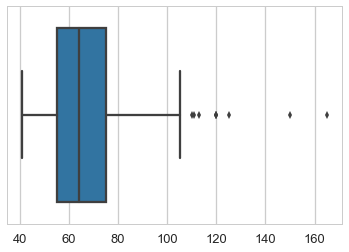

In [15]:
# Analizamos mediante un gráfico los pesos
ax = sns.boxplot(x=pesos_array)

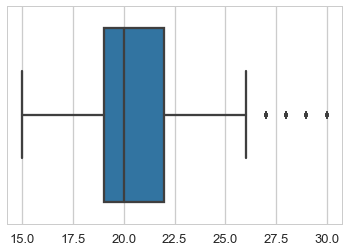

In [16]:
# Analizamos mediante un gráfico las edades
ax = sns.boxplot(x=edades_array)

### Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida?

Rta: Al igual que el cálculo no desglosado por género, las edades es una distribución asimétrica sesgada a la derecha (media ≥ mediana ≥ moda). No así los pesos, al observar los datos de este desglosado por género, se aproximan mas al valor general los femeninos.

In [39]:
dataset_female = dataset.loc[dataset['Gender'] == 'female']
# PESOS FEMENINOS
pesos_female = dataset_female[u'Weight']
# Transformo los pesos a un array de numpy, previamente elinando los valores 'NaN'
pesos_female_array = pesos_female.dropna(axis=0, how='any').values

pesos_female_moda = stats.mode(pesos_female_array)
# Moda, media, mediana, y desviación estándar del peso femino, respectivamente
pesos_female_moda[0], np.mean(pesos_female_array), np.median(pesos_female_array), np.std(pesos_female_array)  

(array([60.]), 58.963793103448275, 57.0, 9.997089201808594)

In [31]:
# EDADES FEMENINAS
edades_female = dataset_female[u'Age']
# Transformo los pesos a un array de numpy, previamente elinando los valores 'NaN'
edades_female_array = edades_female.dropna(axis=0, how='any').values

edades_female_moda = stats.mode(edades_female_array)
# Moda, media, mediana, y desviación estándar del peso femino, respectivamente
edades_female_moda[0], np.mean(edades_female_array), np.median(edades_female_array), np.std(edades_female_array)

(array([19.]), 20.113752122241088, 20.0, 2.790165425784379)

In [38]:
dataset_male = dataset.loc[dataset['Gender'] == 'male']
# PESOS MASCULINOS
pesos_male = dataset_male[u'Weight']
# Transformo los pesos a un array de numpy, previamente elinando los valores 'NaN'
pesos_male_array = pesos_male.dropna(axis=0, how='any').values

pesos_male_moda = stats.mode(pesos_male_array)
# Moda, media, mediana, y desviación estándar del peso masculino, respectivamente
pesos_male_moda[0], np.mean(pesos_male_array), np.median(pesos_male_array), np.std(pesos_male_array) 

(array([80.]), 77.08888888888889, 77.0, 11.335816721380985)

In [34]:
# EDADES MASCULINAS
edades_male = dataset_male[u'Age']
# Transformo los pesos a un array de numpy, previamente elinando los valores 'NaN'
edades_male_array = edades_male.dropna(axis=0, how='any').values

edades_male_moda = stats.mode(edades_male_array)
# Moda, media, mediana, y desviación estándar del peso masculino, respectivamente
edades_male_moda[0], np.mean(edades_male_array), np.median(edades_male_array), np.std(edades_male_array)

(array([19.]), 20.87286063569682, 20.0, 2.7933683048767595)

### Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

In [42]:
%%R
require('ggplot2')

In [56]:
dataset_correlacion = dataset[['Age','Weight','Gender']].dropna(axis=0, how='any')

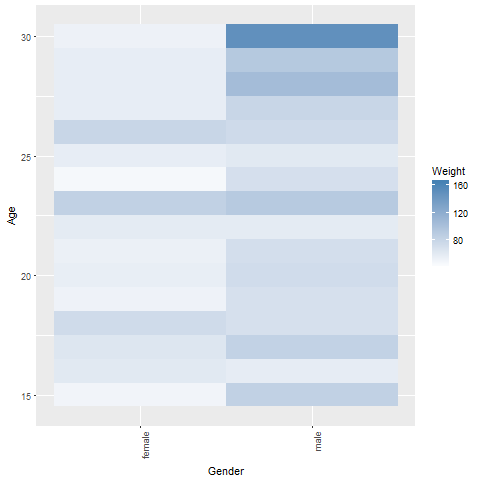

In [57]:
%%R -i dataset_correlacion
ggplot(data = dataset_correlacion, aes(x=Gender, y=Age, fill=Weight)) + 
  geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.
Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.


In [88]:
tabaquismo, counts = np.unique(dataset.Smoking.dropna(axis=0, how='any').values.astype(str),
                             return_counts=True)
tabaquismo_fdps = [x/float(counts.sum()) for x in counts]
tabaquismo_array = [x for x in zip(tabaquismo, tabaquismo_fdps)]
display(HTML(
    '<div>Probabilidad marginal de tabaquismo</div><table><thead><tr><th>Tipo</th><th>Porcentaje</th></tr></thead><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabaquismo_array)
        )
 ))

Tipo,Porcentaje
current smoker,0.18862275449101795
former smoker,0.17465069860279442
never smoked,0.20758483033932135
tried smoking,0.4291417165668663


In [92]:
alcohol, counts = np.unique(dataset.Alcohol.dropna(axis=0, how='any').values.astype(str),
                             return_counts=True)
alcohol_fdps = [x/float(counts.sum()) for x in counts]
alcohol_array = [x for x in zip(alcohol, alcohol_fdps)]
display(HTML(
    '<div>Probabilidad marginal de consumo de alcohol</div><table><thead><tr><th>Tipo</th><th>Porcentaje</th></tr></thead><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in alcohol_array)
        )
 ))

Tipo,Porcentaje
drink a lot,0.2208955223880597
never,0.12338308457711443
social drinker,0.6557213930348259


In [90]:
entrada_conjunta = dataset.groupby(['Smoking','Alcohol']).size().reset_index(name='cantidad')
entrada_conjunta['fdp'] = (entrada_conjunta.cantidad / entrada_conjunta.size) / 100
entrada_conjunta

,Smoking,Alcohol,cantidad,fdp
0,current smoker,drink a lot,78,0.021667
1,current smoker,never,11,0.003056
2,current smoker,social drinker,99,0.027500
3,former smoker,drink a lot,55,0.015278
4,former smoker,never,11,0.003056
5,former smoker,social drinker,109,0.030278
6,never smoked,drink a lot,15,0.004167
7,never smoked,never,61,0.016944
8,never smoked,social drinker,131,0.036389
9,tried smoking,drink a lot,72,0.020000


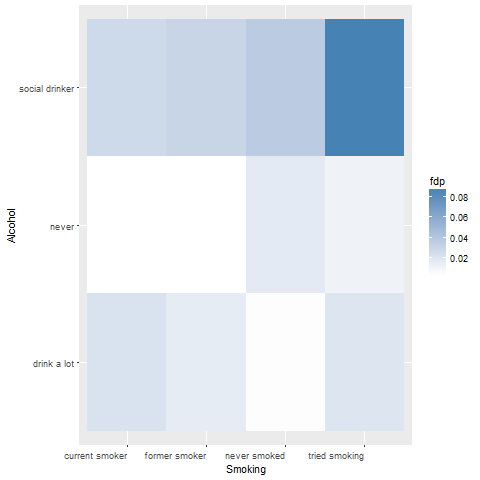

In [91]:
%%R -i entrada_conjunta
ggplot(data = entrada_conjunta, aes(x=Smoking, y=Alcohol, fill=fdp)) + 
  geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
  theme(axis.text.x = element_text(angle = 0, hjust = 1))

### Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

RTA: Los niveles de tabaquismo bajarían si se prohíbe fumar en los bares, ya que el mayor porcentaje en la probabilidad conjunta se lo lleva el tabaquismo con el beber socialmente, y este último esta muy asociado a bares.
Si disminuye la cantidad de fumadores que consumen alcohol, la cantidad de consumidores de alcohol no se vería afectada. 